# Machine Learning Programming – PROG8245  
### Lab 4: Tidying, Cleaning, Imputation, and Outlier Detection  

**Student Name:** Krishna Reddy Bovilla  
**Student ID:** 9050861  


## **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

---

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:
1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

### **PEW Research Dataset**

### 1. Start by Importing the dataset into a pandas dataframe.

In [15]:
import pandas as pd
import numpy as np
file_path = './data/pew-raw.csv'

pew_data = pd.read_csv(file_path)

We load the dataset using a relative path and store it in a pandas DataFrame.A relative path is used for portability



###  2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [16]:
# Define a helper class for inspecting datasets
class DataInspector:
    def __init__(self, dataframe):
        self.df = dataframe

    def show_basic_info(self):
        print("=== First 5 Rows ===")
        display(self.df.head())

        print("\n=== Last 5 Rows ===")
        display(self.df.tail())

        print("\n=== 3rd Row (using iloc) ===")
        display(self.df.iloc[2])

        print("\n=== Value in 'religion' Column of First Row ===")
        print(self.df.loc[0, 'religion'])

# Create an instance for the PEW dataset
pew_inspector = DataInspector(pew_data)

# Call the method to inspect
pew_inspector.show_basic_info()


=== First 5 Rows ===


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35



=== Last 5 Rows ===


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95



=== 3rd Row (using iloc) ===


religion    Buddhist
 <$10k            27
 $10-20k          21
$20-30k           30
$30-40k           34
 $40-50k          33
$50-75k           58
Name: 2, dtype: object


=== Value in 'religion' Column of First Row ===
Agnostic


> ###  Code Overview  
i used a single code block with a helper class to display key parts of the dataset cleanly:
- First and last few rows
- A specific row by index
- A selected cell by label

This avoids using multiple separate cells or `print()` statements, keeping the notebook output well-organized and professional.

---

***What does not seem right in the above dataframe?***

### Problem Identified

In the current format:
- Income ranges (`<$10k`, `$10-20k`, etc.) are used as **column names**, but these are actually *values* of a variable.
- This violates tidy data principles.

We will fix this using the `melt()` function.


### 3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [17]:
# Reshape the dataset using melt to follow tidy data principles
pew_tidy = pd.melt(
    pew_data,
    id_vars='religion',           # Keep 'religion' column fixed
    var_name='income_bracket',    # New column for income levels
    value_name='count'            # New column for the corresponding values
)

# Display the first few rows of the reshaped DataFrame
pew_tidy.head()


,religion,income_bracket,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15



The dataset is now in tidy format:
- `religion` remains as is
- `income_bracket` contains what were originally column names
- `count` stores the frequency values

This transformation allows easier filtering, grouping, and statistical analysis.


> ---

## **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

### 1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [18]:
import pandas as pd

# Step 1: Load the dataset using unicode_escape encoding
billboard_data = pd.read_csv('./data/billboard.csv', encoding='unicode_escape')


We load the dataset using `unicode_escape` encoding to handle any non-standard characters that would otherwise cause errors with `utf-8`.

The dataset contains weekly Billboard rankings of popular songs over time.


### 2. Observe the first few rows of the dataset.

In [19]:
# Display the first few rows
billboard_data.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We inspect the top rows to understand the structure and format of the dataset before applying any transformations. This helps identify issues such as non-tidy formatting, inconsistent column names, or missing values.


***What is wrong with the above dataset?***

The dataset is in a wide format where each column after the initial metadata represents a separate week. This violates tidy data principles:

- Week numbers are used as column headers instead of values in a single `week` column.
- Rankings are spread across multiple columns, making it harder to filter, group, or analyze.

To tidy the dataset, we need to reshape it using the `melt()` function.


### 3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [20]:
# Reshape the dataset using melt without modifying column names
billboard_tidy = pd.melt(
    billboard_data,
    id_vars=[
        'year',
        'artist.inverted',
        'track',
        'time',
        'genre',
        'date.entered',
        'date.peaked'
    ],  # Keep metadata columns fixed
    var_name='week',              # All other columns become values in the 'week' column
    value_name='rank'             # Weekly chart positions
)

# Display the first few rows
billboard_tidy.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


The dataset has weekly rankings spread across multiple columns (e.g., `x1st.week`, `x2nd.week`, etc.). 
We use the `melt()` function to turn these columns into rows under a new `week` column, with the corresponding values stored in a `rank` column.


> If we inspect the current dataframe. We find that it is structured in a better way than before. 

> However, the ***Week*** column looks a bit ugly!

### 4. Let's try to place only the week number in that column without the extras surronding it.

In [21]:


# Step 2: Identify columns that represent weekly rankings
week_columns = [col for col in billboard_data.columns if col.startswith('x') and col.endswith('.week')]

# Step 3: Melt the week columns into a long format
billboard_tidy = pd.melt(
    billboard_data,
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked'],
    value_vars=week_columns,
    var_name='week',
    value_name='rank'
)

# Step 4: Extract numeric week number from the 'week' column (e.g., from 'x1st.week' → 1)
billboard_tidy['week'] = billboard_tidy['week'].str.extract(r'(\d+)', expand=False)
billboard_tidy['week'] = pd.to_numeric(billboard_tidy['week'], errors='coerce')

# Step 5: Preview unique week numbers
billboard_tidy[['week']].drop_duplicates().sort_values('week').reset_index(drop=True).head(10)
# Display a preview of the cleaned and reshaped dataframe
billboard_tidy[['year', 'artist.inverted', 'track', 'time', 'genre',
                'date.entered', 'date.peaked', 'week', 'rank']].head(1000)



,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...,...,...,...
995,2000,"Badu, Erkyah",Bag Lady,5:03,Rock,2000-08-19,2000-10-07,4,41.0
996,2000,Pink,There U Go,3:23,Rock,2000-03-04,2000-04-08,4,11.0
997,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,4,63.0
998,2000,Nelly,(Hot S**t) Country Grammar,4:17,Rap,2000-04-29,2000-09-16,4,76.0



The original `week` column contains verbose labels such as `x1st.week`, `x2nd.week`, etc.
we extract just the numeric portion representing the actual week number.


### 5. Now let's inspect the ***Week*** column in the dataframe.

In [22]:
from IPython.display import display

unique_weeks = billboard_tidy['week'].dropna().drop_duplicates().sort_values().reset_index(drop=True)

unique_weeks_df = unique_weeks.to_frame(name='week_number')

display(unique_weeks_df.head(10).style.hide(axis='index'))


week_number
1
2
3
4
5
6
7
8
9
10



After reshaping the dataset, the `week` column contains values such as `x1st.week`, `x2nd.week`, etc. These are not in a usable numeric format.

We inspect these values to understand the pattern and prepare them for cleaning using regular expressions.


> Next, let's try to find the date at which the song ranked the number that is shown per row.

### 6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [23]:
# Ensure 'entry_date' is in datetime format
billboard_tidy['date.entered'] = pd.to_datetime(billboard_tidy['date.entered'], errors='coerce')

# Compute the date the song charted during the r-th week
billboard_tidy['chart.date'] = billboard_tidy['date.entered'] + pd.to_timedelta((billboard_tidy['week'] - 1) * 7, unit='d')

# Preview the result with selected columns
from IPython.display import display

display(
    billboard_tidy[[
        'track', 'artist.inverted', 'date.entered', 'week', 'chart.date', 'rank'
    ]].dropna(subset=['chart.date']).head(10)
)


,track,artist.inverted,date.entered,week,chart.date,rank
0,Independent Women Part I,Destiny's Child,2000-09-23,1,2000-09-23,78.0
1,"Maria, Maria",Santana,2000-02-12,1,2000-02-12,15.0
2,I Knew I Loved You,Savage Garden,1999-10-23,1,1999-10-23,71.0
3,Music,Madonna,2000-08-12,1,2000-08-12,41.0
4,Come On Over Baby (All I Want Is You),"Aguilera, Christina",2000-08-05,1,2000-08-05,57.0
5,Doesn't Really Matter,Janet,2000-06-17,1,2000-06-17,59.0
6,Say My Name,Destiny's Child,1999-12-25,1,1999-12-25,83.0
7,Be With You,"Iglesias, Enrique",2000-04-01,1,2000-04-01,63.0
8,Incomplete,Sisqo,2000-06-24,1,2000-06-24,77.0
9,Amazed,Lonestar,1999-06-05,1,1999-06-05,81.0


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


**Timedeltas** represent time differences.  
We use them to add week offsets to dates using `pd.to_timedelta()`.


***What is the problem with the calculation above?***

If `week` has missing values or `entry_date` is not in datetime format,  
the chart date calculation won't work correctly.  
We need to clean these columns first.

### 7. Let's only keep necessary columns

In [24]:
# Keep only relevant columns
billboard_tidy = billboard_tidy[[
    'year', 'artist.inverted', 'track', 'genre', 'date.entered', 'week', 'rank', 'chart.date'
]]

# Preview the cleaned DataFrame
billboard_tidy.head()


,year,artist.inverted,track,genre,date.entered,week,rank,chart.date
0,2000,Destiny's Child,Independent Women Part I,Rock,2000-09-23,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",Rock,2000-02-12,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,Rock,1999-10-23,1,71.0,1999-10-23
3,2000,Madonna,Music,Rock,2000-08-12,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,2000-08-05,1,57.0,2000-08-05



We select only the columns needed for analysis and remove the rest to make the data cleaner.


### 8. How to rename your columns?

In [25]:
# Rename columns for clarity and consistency
billboard_tidy = billboard_tidy.rename(columns={
    'artist.inverted': 'artist_name',
    'track': 'song_title',
    'genre': 'music_genre',
    'date.entered': 'entry_date',
    'week': 'week_number',
    'rank': 'chart_rank',
    'chart.date': 'chart_date'
})

# Display the updated column names
billboard_tidy.head()


,year,artist_name,song_title,music_genre,entry_date,week_number,chart_rank,chart_date
0,2000,Destiny's Child,Independent Women Part I,Rock,2000-09-23,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",Rock,2000-02-12,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,Rock,1999-10-23,1,71.0,1999-10-23
3,2000,Madonna,Music,Rock,2000-08-12,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,2000-08-05,1,57.0,2000-08-05



We rename the columns to make them easier to read and more consistent for analysis.


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>

Some rows have `NaN` in the `chart_rank` column.  
This means the song was not on the chart that week.

We will remove these rows to keep only valid chart entries.

### 9. Apply quick data cleaning and then observe the dataset

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and mored


In [26]:
# Check for missing values
missing_values = billboard_tidy.isna().sum()
# Detect duplicates
duplicate_count = billboard_tidy.duplicated().sum()
# Display inspection results
print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_count)



Missing Values:
 year               0
artist_name        0
song_title         0
music_genre        0
entry_date         0
week_number        0
chart_rank     18785
chart_date         0
dtype: int64

Duplicate Rows: 0



Before cleaning, we check for:

- **Missing values** in each column.
- **Duplicate rows** in the dataset.

This helps us understand data quality and decide how to handle inconsistencies.


In [27]:
# 1. Drop rows with missing critical values: 'chart_rank' or 'chart_date'
billboard_tidy = billboard_tidy.dropna(subset=['chart_rank', 'chart_date']).copy()

# 2. Remove exact duplicate rows
billboard_tidy = billboard_tidy.drop_duplicates()

# 3. Normalize column names: lowercase, stripped, underscores instead of spaces
billboard_tidy.columns = [col.strip().lower().replace(' ', '_') for col in billboard_tidy.columns]

# 4. Preview the cleaned DataFrame
billboard_tidy.head()


,year,artist_name,song_title,music_genre,entry_date,week_number,chart_rank,chart_date
0,2000,Destiny's Child,Independent Women Part I,Rock,2000-09-23,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",Rock,2000-02-12,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,Rock,1999-10-23,1,71.0,1999-10-23
3,2000,Madonna,Music,Rock,2000-08-12,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),Rock,2000-08-05,1,57.0,2000-08-05




1. **Remove rows** where `chart_rank` or `chart_date` is missing.
2. **Drop duplicate rows** to avoid repetition.
3. **Standardize column names** by:
   - Converting to lowercase
   - Replacing spaces with underscores
   - Stripping any extra whitespace

Finally, we preview the cleaned DataFrame.

---


### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [28]:
# Step 1: Read the full dataset including the data type row
cars_full = pd.read_csv('./data/cars.csv', sep=';')

# Step 2: Display the row containing the data types (second row)
cars_full.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US


## First Row seems to be the datatype, we need to remove it

In [29]:
# Step 3: Remove the data type row (index 1)
cars = cars_full.drop(index=0).reset_index(drop=True)

# Display cleaned dataset
cars.head()


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
2,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


We successfully removed the unwanted metadata row from the dataset.


### Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [30]:
# Calculate percentage of missing values
missing_percent = (cars.isnull().sum() / len(cars)) * 100

# Combine into one table
missing_summary = pd.DataFrame({
    'Missing Count': cars.isnull().sum(),
    'Missing Percentage (%)': np.round(missing_percent, 2)
})

# Display summary
missing_summary


,Missing Count,Missing Percentage (%)
Car,0,0.00
MPG,3,0.74
Cylinders,0,0.00
Displacement,1,0.25
Horsepower,2,0.49
Weight,1,0.25
Acceleration,0,0.00
Model,0,0.00
Origin,0,0.00



We calculate how many values are missing in each column and show their percentage to understand the impact.

---


There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [31]:
# Drop rows with missing values
cars_dropped = cars.dropna()

# Compare shape before and after dropping nulls
print("Original dataset shape:", cars.shape)
print("After dropping rows with nulls:", cars_dropped.shape)

# Preview the cleaned dataset
cars_dropped.head()


Original dataset shape: (406, 9)
After dropping rows with nulls: (401, 9)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
6,Chevrolet Impala,14.0,8,454.0,220.0,4354.,9.0,70,US
7,Plymouth Fury iii,14.0,8,440.0,215.0,4312.,8.5,70,US
8,Pontiac Catalina,14.0,8,455.0,225.0,4425.,10.0,70,US
9,AMC Ambassador DPL,15.0,8,390.0,190.0,3850.,8.5,70,US


We remove all rows that contain missing values and compare the size of the dataset before and after the removal.

Lets also check dropping the columns

Let's observe how many columns we lost

In [32]:
# Drop columns that contain any missing values
cars_dropped_columns = cars.dropna(axis=1)

# Compare number of columns before and after
original_column_count = cars.shape[1]
new_column_count = cars_dropped_columns.shape[1]
columns_lost = original_column_count - new_column_count

print(f"Original number of columns: {original_column_count}")
print(f"Number of columns after dropping: {new_column_count}")
print(f"Number of columns lost: {columns_lost}")

# Show which columns were dropped
dropped = set(cars.columns) - set(cars_dropped_columns.columns)
print("Dropped columns:", dropped)


Original number of columns: 9
Number of columns after dropping: 5
Number of columns lost: 4
Dropped columns: {'MPG', 'Horsepower', 'Weight', 'Displacement'}


We remove any columns that have missing values, then compare how many columns were dropped from the original dataset.








### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [33]:
cars.fillna(0)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,0,8,307.0,130.0,3504.,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,0,3693.,11.5,70,US
2,Plymouth Satellite,0,8,318.0,150.0,3436.,11.0,70,US
3,AMC Rebel SST,16.0,8,0,150.0,0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
401,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


We replace all missing values in the dataset with 0.  


However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

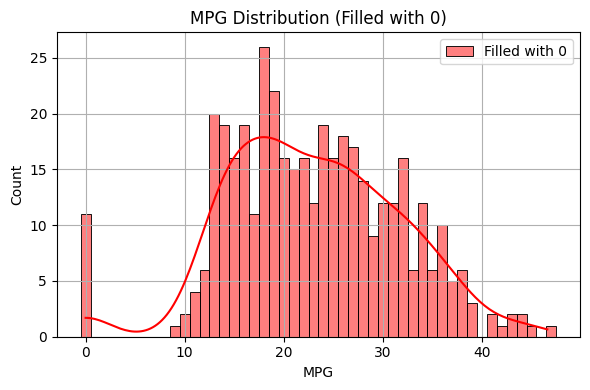

In [34]:
# Step 1: Fill missing values in a copy with 0
import matplotlib.pyplot as plt
import seaborn as sns


cars_zero_filled = cars.copy()
cars_zero_filled['MPG_zero'] = cars_zero_filled['MPG'].copy()
cars_zero_filled['MPG_zero'] = cars_zero_filled['MPG_zero'].fillna(0)

# Step 2: Plot
plt.figure(figsize=(6, 4))
sns.histplot(cars_zero_filled['MPG_zero'], bins=20, kde=True, color='red', label='Filled with 0')
plt.title("MPG Distribution (Filled with 0)")
plt.xlabel("MPG")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We create a new column where missing MPG values are filled with 0, then plot its distribution to see how it affects the data.








If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

In [35]:
# Step 1: List columns expected to be numeric
columns_to_convert = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']

# Step 2: Convert each column to numeric (show before/after types)
print("Data types BEFORE conversion:")
print(cars[columns_to_convert].dtypes)

for column in columns_to_convert:
    cars[column] = pd.to_numeric(cars[column], errors='coerce')

print("\nData types AFTER conversion:")
print(cars[columns_to_convert].dtypes)


Data types BEFORE conversion:
MPG             object
Cylinders       object
Displacement    object
Horsepower      object
Weight          object
Acceleration    object
dtype: object

Data types AFTER conversion:
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
dtype: object



We make sure that all important columns are in numeric format so we can perform calculations like mean or median.  
This also helps in handling missing values properly.


In [36]:
# Step 3: Show missing values before imputation
missing_before = cars[columns_to_convert].isnull().sum()
print("Missing values BEFORE imputation:\n")
print(missing_before)

Missing values BEFORE imputation:

MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
dtype: int64


We count how many missing values are present in each numeric column before filling them.








In [37]:
from sklearn.impute import SimpleImputer

# Step 4: Apply SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')
cars[columns_to_convert] = imputer.fit_transform(cars[columns_to_convert])

# Optional: Show the mean values used for imputation
mean_values = pd.Series(imputer.statistics_, index=columns_to_convert)

print(" Missing values filled using mean strategy.\n")
print("Mean values used for each column:")
print(mean_values.round(2))


 Missing values filled using mean strategy.

Mean values used for each column:
MPG               23.10
Cylinders          5.48
Displacement     194.51
Horsepower       103.14
Weight          2978.29
Acceleration      15.52
dtype: float64



We use `SimpleImputer` to fill missing values in numeric columns with the column mean.  
This is a common strategy when the data follows a normal distribution.

In [38]:
# Step 5: Final check after imputation
missing_after = cars[columns_to_convert].isnull().sum()
print("Remaining missing values (AFTER imputation):\n")
print(missing_after)


Remaining missing values (AFTER imputation):

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
dtype: int64


We verify that there are no more missing values left in the selected columns after applying mean imputation.








Now let's see what is the mean of the MPG column

In [39]:
# Calculate and display the mean of the MPG column
mpg_mean_value = cars['MPG'].mean()
print(f"The mean of the 'MPG' column is: {round(mpg_mean_value, 2)}")

The mean of the 'MPG' column is: 23.1


We calculate the mean value of the `MPG` column after filling missing values. This helps summarize the central value of the data.








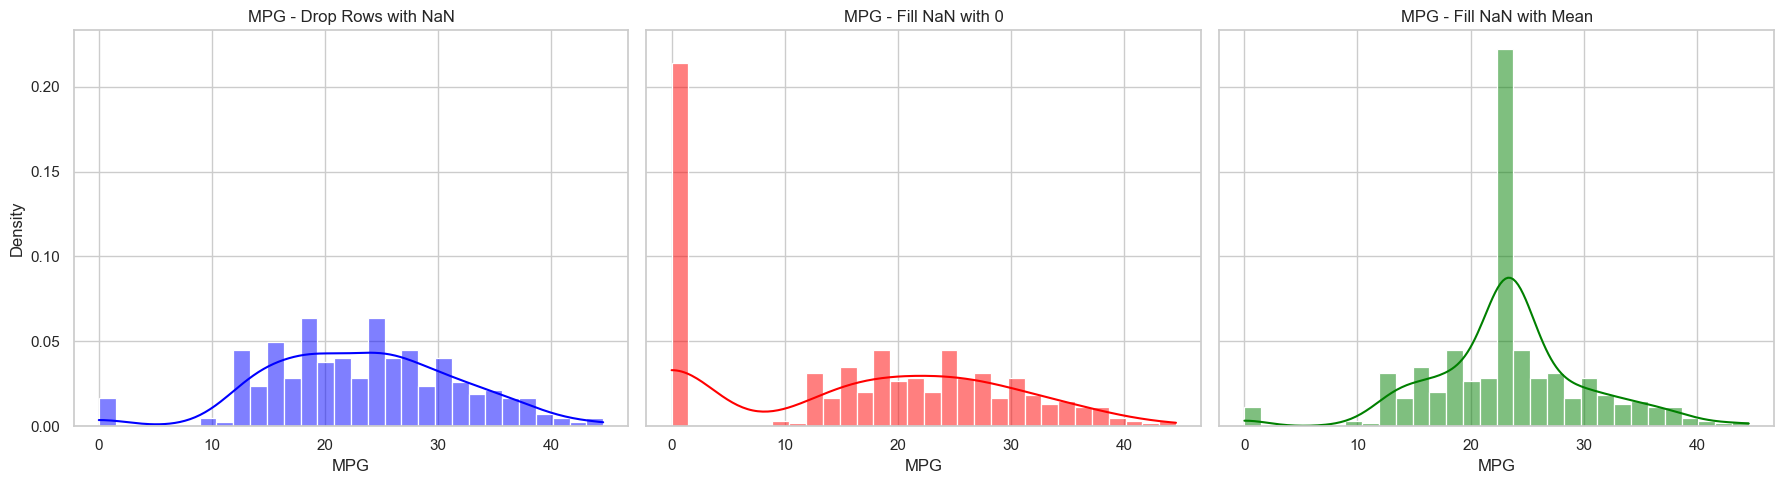

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure consistent style
sns.set(style='whitegrid')

# Sample loading step (assuming 'cars' is already defined in environment)
# Convert 'MPG' to numeric
cars_copy = cars.copy()
cars_copy['MPG'] = pd.to_numeric(cars_copy['MPG'], errors='coerce')

# Step 1: Artificially introduce missing values into 30% of 'MPG'
np.random.seed(42)
missing_indices = cars_copy.sample(frac=0.3).index
cars_copy.loc[missing_indices, 'MPG'] = np.nan
missing_count = len(missing_indices)

# Step 2: Create 3 variations of 'MPG' column based on different handling strategies
mpg_drop_rows = cars_copy['MPG'].dropna()
mpg_fill_zero = cars_copy['MPG'].fillna(0)
mpg_fill_mean = cars_copy['MPG'].fillna(cars_copy['MPG'].mean())

# Step 3: Plot the three numeric versions side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Histogram - Dropped rows
sns.histplot(mpg_drop_rows, bins=30, kde=True, stat='density', color='blue', alpha=0.5, ax=axes[0])
axes[0].set_title('MPG - Drop Rows with NaN')
axes[0].set_xlabel('MPG')
axes[0].set_ylabel('Density')

# Histogram - Fill with 0
sns.histplot(mpg_fill_zero, bins=30, kde=True, stat='density', color='red', alpha=0.5, ax=axes[1])
axes[1].set_title('MPG - Fill NaN with 0')
axes[1].set_xlabel('MPG')

# Histogram - Fill with Mean
sns.histplot(mpg_fill_mean, bins=30, kde=True, stat='density', color='green', alpha=0.5, ax=axes[2])
axes[2].set_title('MPG - Fill NaN with Mean')
axes[2].set_xlabel('MPG')

plt.tight_layout()
plt.show()

# Create a summary of missing values introduced
summary_df = pd.DataFrame({
    "Total Entries": [cars_copy.shape[0]],
    "Missing MPG Introduced": [missing_count],
    "Missing Percentage": [round((missing_count / cars_copy.shape[0]) * 100, 2)]
})



### Compare Different Imputation Methods for MPG

We simulate missing values in 30% of the `MPG` column and compare three ways to handle them:

1. **Drop rows with missing values**
2. **Fill missing values with 0**
3. **Fill missing values with the column mean**

The distributions are shown side-by-side to understand how each method affects the shape of the data.


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

### Car Dataset – What i Did with SimpleImputer

i used the `SimpleImputer` class from `sklearn` to handle missing values in key numeric columns.

**Steps we followed:**
1. Selected columns like `MPG`, `Horsepower`, and `Weight` that had missing values.
2. Converted those columns to numeric type (to allow calculations).
3. Used `SimpleImputer` with the `mean` strategy to fill in the missing values.
4. Verified that all missing values were filled successfully.

This approach allowed us to keep all rows and ensure the data is ready for analysis or modeling.


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [41]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load diabetes dataset
diabetes_data = load_diabetes()

# Convert to DataFrame
df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

# Add target column
df_diabetes['target'] = diabetes_data.target

# Preview the data
df_diabetes.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


We load the built-in diabetes dataset from `sklearn`, convert it into a pandas DataFrame, and add the target column (which represents disease progression).  
This dataset will be used to explore outlier detection techniques

### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

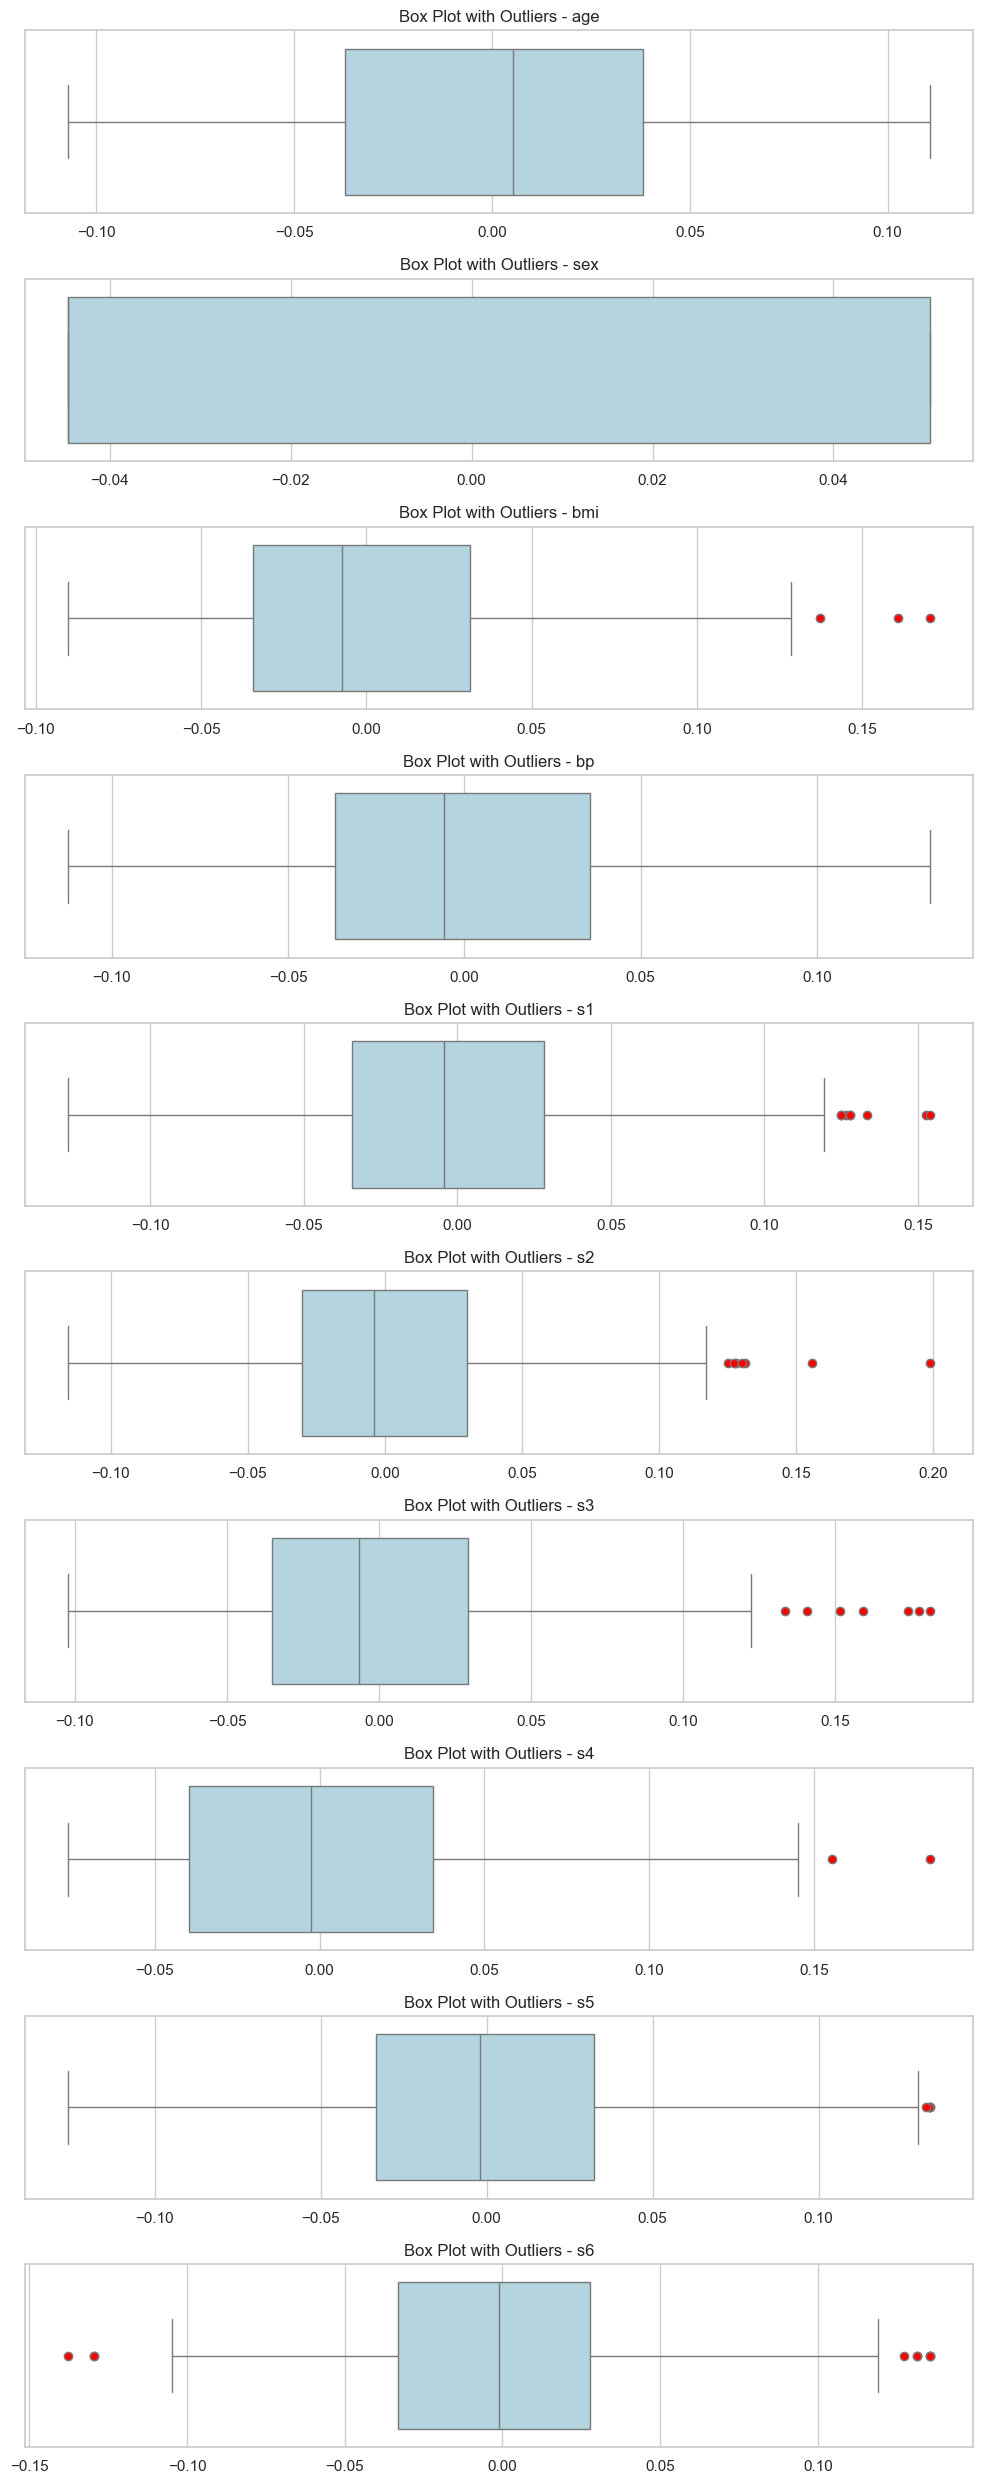

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Create subplots for box plots with outliers
num_features = len(df_diabetes.columns[:-1])
fig, axes = plt.subplots(nrows=num_features, figsize=(10, num_features * 2.5))

# Plot each feature's boxplot with outliers highlighted
for i, feature in enumerate(df_diabetes.columns[:-1]):
    sns.boxplot(x=df_diabetes[feature], ax=axes[i], color='lightblue', fliersize=5,
                flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
    axes[i].set_title(f'Box Plot with Outliers - {feature}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


We create individual box plots for each feature (excluding the target) to identify potential outliers.  
Outliers appear as red dots outside the whiskers of the boxes.

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

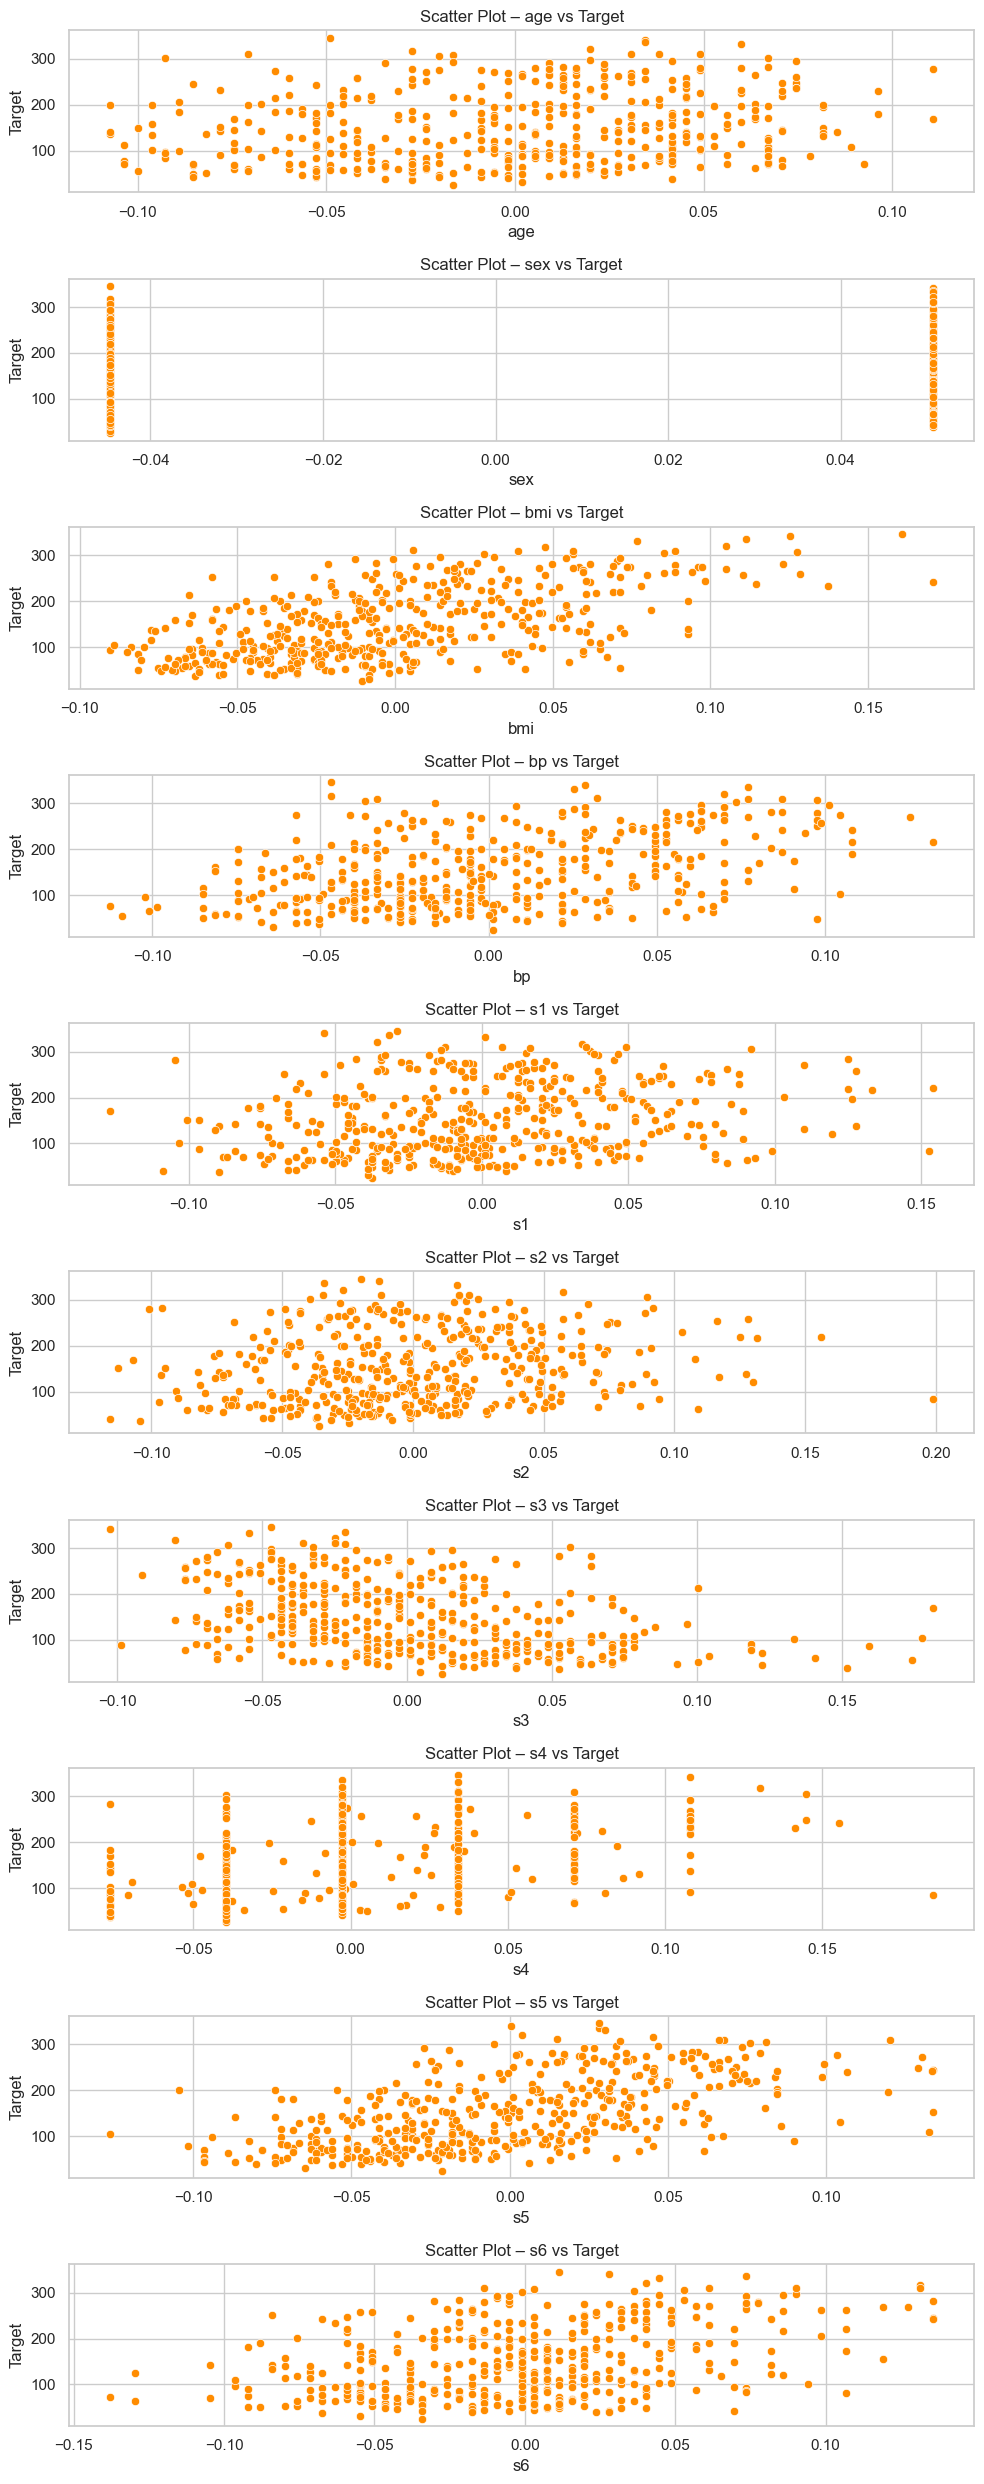

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Features to plot (exclude target)
features = df_diabetes.columns[:-1]
num_features = len(features)

# Create subplots
fig, axes = plt.subplots(nrows=num_features, figsize=(10, num_features * 2.5))

# Plot scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=df_diabetes[feature], y=df_diabetes['target'], ax=axes[i], color='darkorange')
    axes[i].set_title(f'Scatter Plot – {feature} vs Target')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Target')

plt.tight_layout()
plt.show()


We use scatter plots to explore the relationship between each feature and the target variable.  
This helps us spot patterns, trends, and potential outliers in the data.









#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [44]:
# Select only numeric columns for Z-score calculation
numeric_data = df_diabetes.select_dtypes(include=[np.number])
# Manually compute Z-scores using: Z = (X - mean) / std
mean_values = numeric_data.mean()
std_values = numeric_data.std()
z_scores = (numeric_data - mean_values) / std_values
# Define thresholds
threshold_2 = 2
threshold_3 = 3

# Create boolean masks for outliers
outliers_z2 = (np.abs(z_scores) > threshold_2)
outliers_z3 = (np.abs(z_scores) > threshold_3)

# Output: Total number of outlier cells across all numeric columns
print(f"Total outliers with Z-score > {threshold_2}: {outliers_z2.sum().sum()}")
print(f"Total outliers with Z-score > {threshold_3}: {outliers_z3.sum().sum()}")



Total outliers with Z-score > 2: 179
Total outliers with Z-score > 3: 15


We calculate Z-scores for all numeric columns to find outliers.  
A Z-score tells how far a value is from the mean in terms of standard deviations.

- Values with Z > 2 or Z > 3 are considered potential outliers.
- We count how many outlier values exist for each threshold.









Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [45]:
# Count how many outliers per column for each threshold
outlier_summary = pd.DataFrame({
    'Feature': numeric_data.columns,
    'Outliers (Z > 2)': outliers_z2.sum().values,
    'Outliers (Z > 3)': outliers_z3.sum().values
})

# Display sorted summary
outlier_summary.sort_values(by='Outliers (Z > 2)', ascending=False).reset_index(drop=True)


,Feature,Outliers (Z > 2),Outliers (Z > 3)
0,s6,21,0
1,s1,20,2
2,s5,20,0
3,s2,20,2
4,s4,19,4
5,bp,19,0
6,s3,18,5
7,age,16,0
8,bmi,15,2
9,target,11,0


### Outlier Summary by Feature (Z-Score)

We count the number of outliers in each feature using two Z-score thresholds:  
- Z > 2 (mild outliers)  
- Z > 3 (strong outliers)

The features are sorted by the number of Z > 2 outliers.


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

In [46]:
# Select only numeric columns for IQR calculation
numeric_data = df_diabetes.select_dtypes(include=[np.number])

# Create a DataFrame to store whether each value is an outlier
iqr_flags = pd.DataFrame(index=numeric_data.index)

# Loop over numeric columns to calculate IQR and bounds
for column in numeric_data.columns:
    Q1 = numeric_data[column].quantile(0.25)
    Q3 = numeric_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    iqr_flags[column] = (numeric_data[column] < lower_bound) | (numeric_data[column] > upper_bound)


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

In [47]:
# Count the number of outliers per column
iqr_outlier_summary = pd.DataFrame({
    'Feature': iqr_flags.columns,
    'Outlier Count': iqr_flags.sum().values
})

# Display the summary sorted by count of outliers
iqr_outlier_summary = iqr_outlier_summary.sort_values(by='Outlier Count', ascending=False).reset_index(drop=True)
display(iqr_outlier_summary)


,Feature,Outlier Count
0,s6,9
1,s1,8
2,s3,7
3,s2,7
4,s5,4
5,bmi,3
6,s4,2
7,sex,0
8,age,0
9,bp,0



We use the IQR method to identify outliers in each numeric column.

Steps:
- Calculate Q1 (25th percentile) and Q3 (75th percentile)
- Compute IQR = Q3 - Q1
- Define outlier bounds:  
  - Lower = Q1 - 1.5 × IQR  
  - Upper = Q3 + 1.5 × IQR
- Count how many values fall outside these bounds for each column

The result is a summary of outlier counts per feature.


### Remove Outliers

- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

In [48]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes_data = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

# Step 1: Remove outliers using IQR for all numeric columns
df_clean = df_diabetes.copy()
for column in df_clean.columns:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]

# Step 2: Report summary
original_shape = df_diabetes.shape
cleaned_shape = df_clean.shape
rows_removed = original_shape[0] - cleaned_shape[0]

print(f"--- Outlier Removal Summary ---")
print(f"Original dataset shape   : {original_shape[0]} rows × {original_shape[1]} columns")
print(f"After IQR cleaning       : {cleaned_shape[0]} rows × {cleaned_shape[1]} columns")
print(f"Total rows removed       : {rows_removed}")


--- Outlier Removal Summary ---
Original dataset shape   : 442 rows × 10 columns
After IQR cleaning       : 407 rows × 10 columns
Total rows removed       : 35


### Remove Outliers Using IQR Method

We apply the IQR method across all columns to remove rows containing outliers.

**Steps:**
- For each column, calculate Q1, Q3, and IQR.
- Define lower and upper bounds using 1.5 × IQR.
- Keep only the rows where values are within bounds.

Finally, we compare the dataset size before and after outlier removal to see how many rows were removed.
